In [ ]:
!pip install transformers
!pip install lightning

Code is from the excellent tutorial "[Coding Stable Diffusion from scratch in PyTorch](https://www.reddit.com/r/learnmachinelearning/comments/16t7ezr/coding_stable_diffusion_from_scratch_in_pytorch/)", check it out.

In [ ]:
!if [[ ! -e "pytorch-stable-diffusion" ]]; then git clone https://github.com/hkproj/pytorch-stable-diffusion.git; fi

In [ ]:
%cd /content/pytorch-stable-diffusion

!if [[ ! -e "data" ]]; then mkdir "data"; cd "data"; wget "https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/tokenizer/merges.txt"; wget "https://huggingface.co/runwayml/stable-diffusion-v1-5/raw/main/tokenizer/vocab.json"; wget "https://huggingface.co/runwayml/stable-diffusion-v1-5/resolve/main/v1-5-pruned-emaonly.ckpt"; fi


In [ ]:
import sys
import os

directory = '/content/pytorch-stable-diffusion/sd'
%cd /content/pytorch-stable-diffusion/sd
sys.path.append(directory)

/content/pytorch-stable-diffusion/sd


In [ ]:
%cd /content/pytorch-stable-diffusion/sd

import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = True
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("../data/vocab.json", merges_file="../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

prompt = "photo of young woman, highlight hair, sitting outside restaurant, wearing dress, rim lighting, studio lighting, looking at the camera, dslr, ultra quality, sharp focus, tack sharp, dof, film grain, Fujifilm XT3, crystal clear, 8K UHD, highly detailed glossy eyes, high detailed skin, skin pores"
uncond_prompt = "ugly, deform, disfigured"  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14
input_image = None
strength = 0.9



/content/pytorch-stable-diffusion/sd
Using device: cuda


/content/pytorch-stable-diffusion/sd


100%|██████████| 1/1 [00:03<00:00,  3.87s/it]


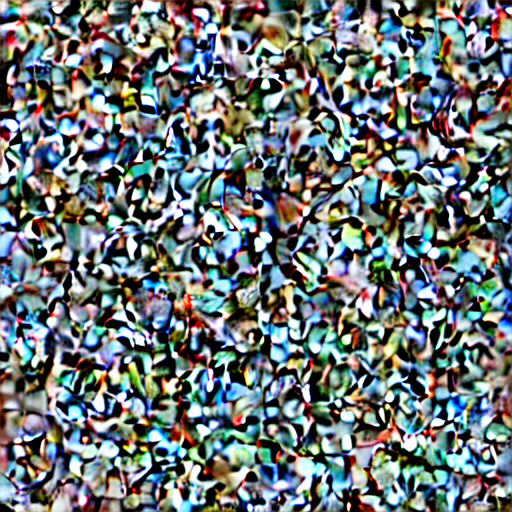

100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


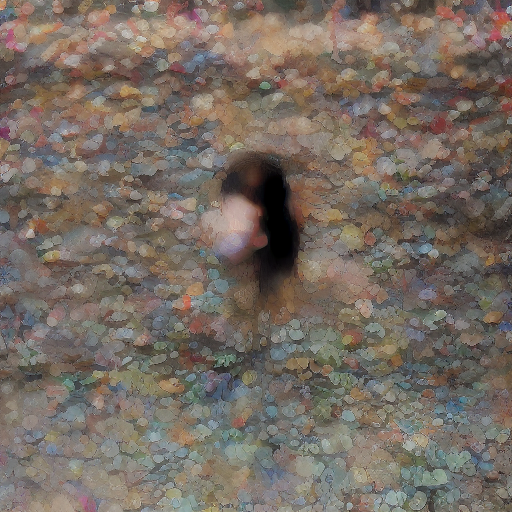

100%|██████████| 3/3 [00:01<00:00,  2.23it/s]


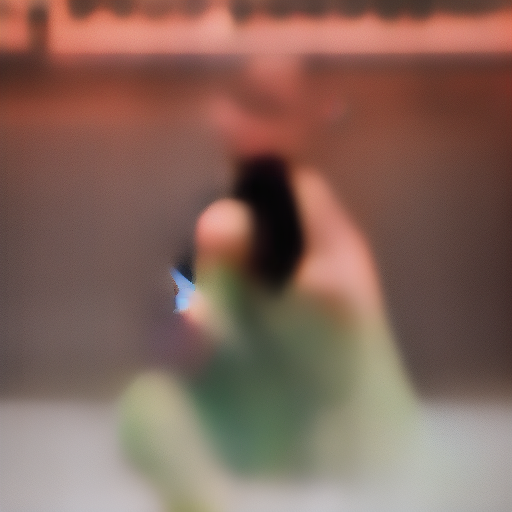

100%|██████████| 4/4 [00:01<00:00,  2.02it/s]


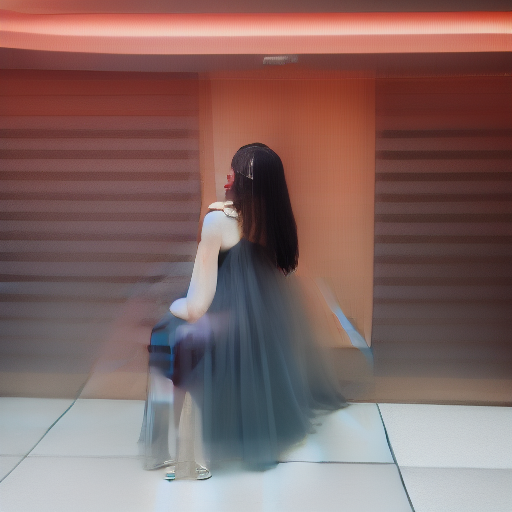

100%|██████████| 5/5 [00:02<00:00,  1.90it/s]


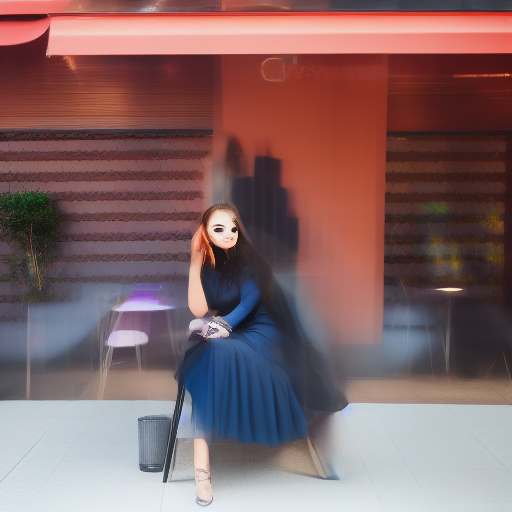

100%|██████████| 6/6 [00:03<00:00,  1.80it/s]


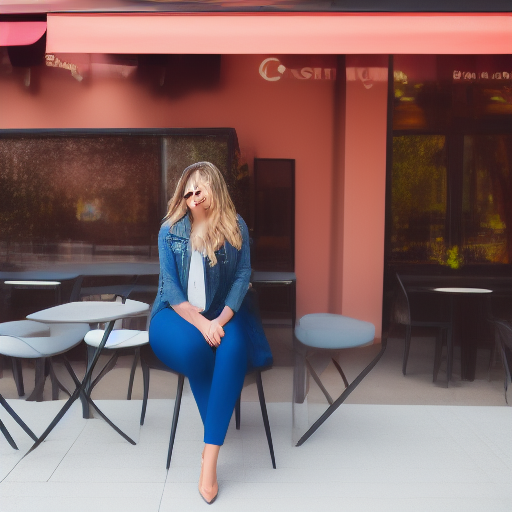

100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


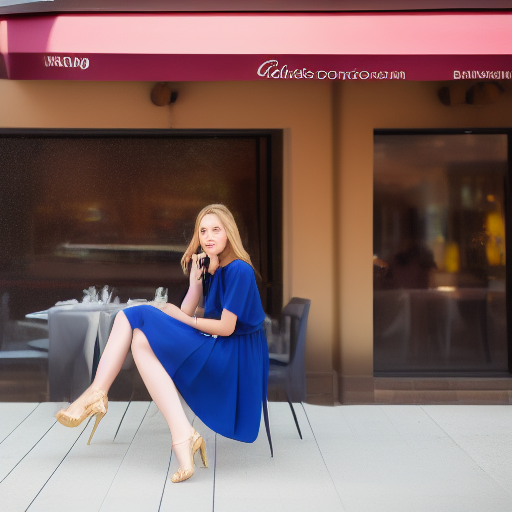

100%|██████████| 11/11 [00:06<00:00,  1.72it/s]


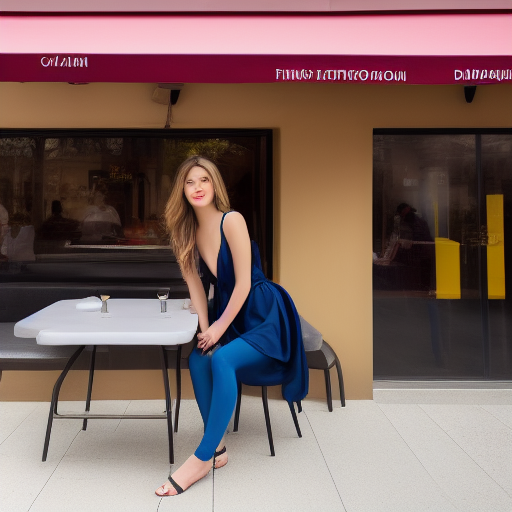

100%|██████████| 14/14 [00:08<00:00,  1.72it/s]


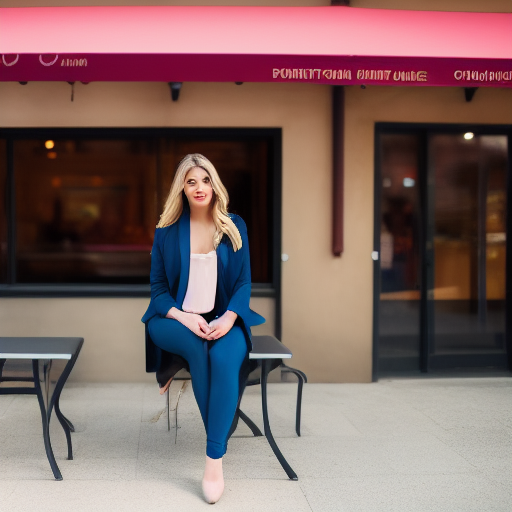

100%|██████████| 18/18 [00:10<00:00,  1.72it/s]


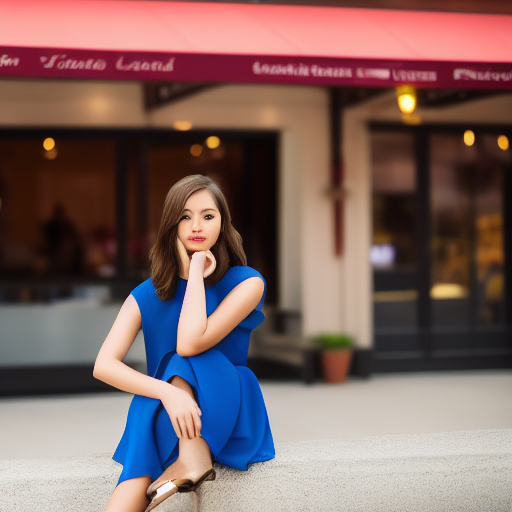

100%|██████████| 23/23 [00:13<00:00,  1.71it/s]


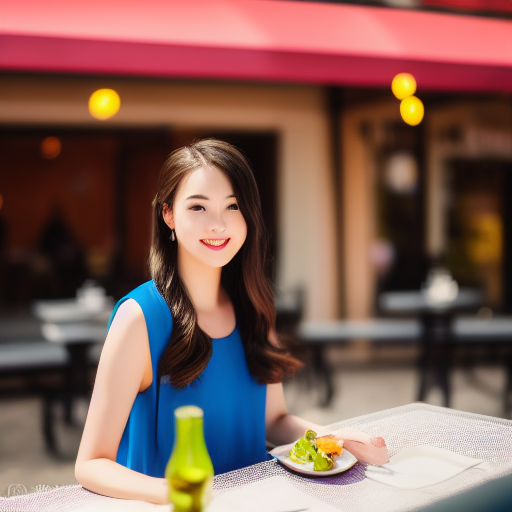

100%|██████████| 29/29 [00:17<00:00,  1.67it/s]


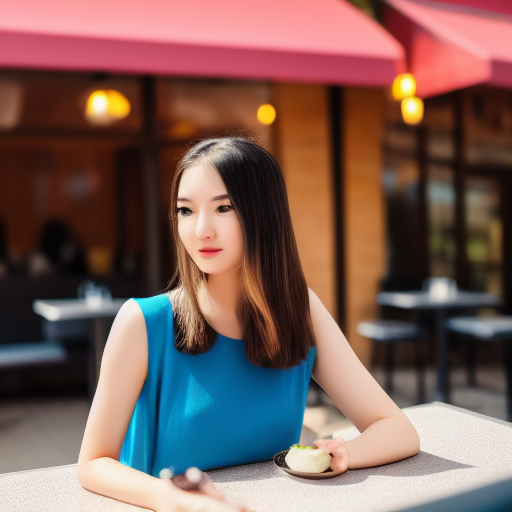

100%|██████████| 37/37 [00:22<00:00,  1.65it/s]


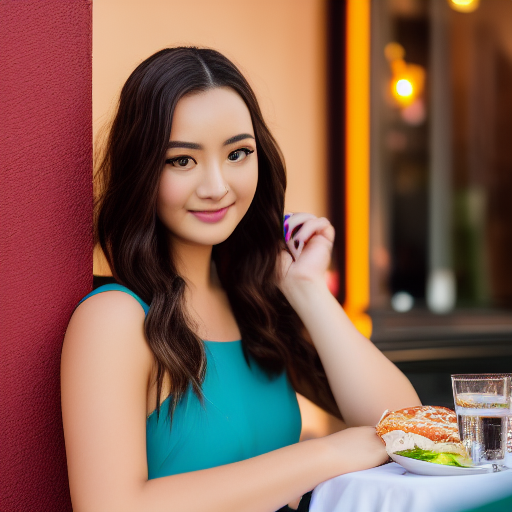

100%|██████████| 48/48 [00:28<00:00,  1.66it/s]


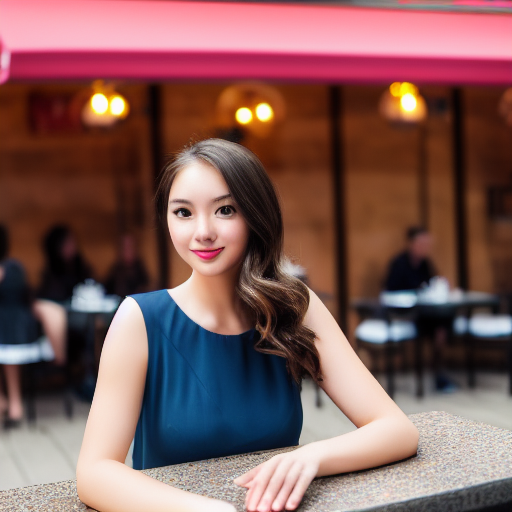

100%|██████████| 61/61 [00:37<00:00,  1.65it/s]


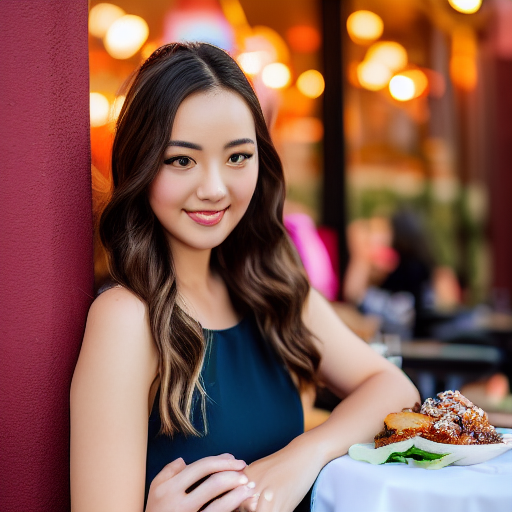

100%|██████████| 78/78 [00:47<00:00,  1.65it/s]


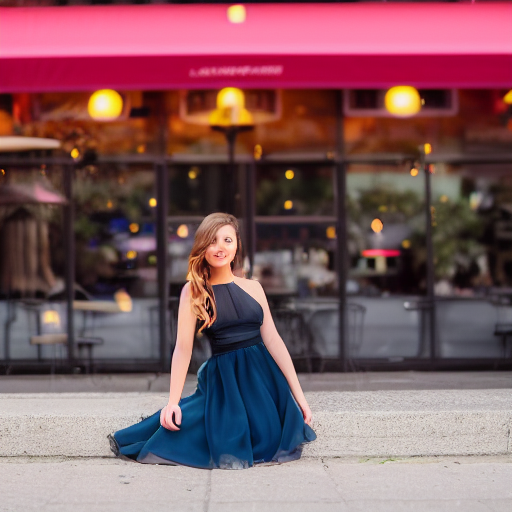

100%|██████████| 100/100 [01:01<00:00,  1.64it/s]


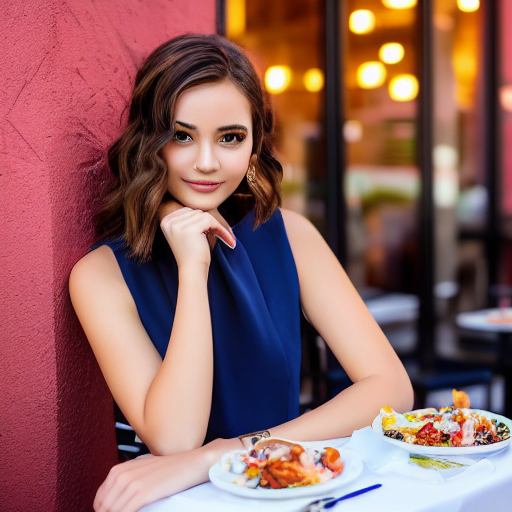

In [ ]:
%cd /content/pytorch-stable-diffusion/sd

from IPython.display import display
import datetime

for i in [1, 2, 3, 4, 5, 6, 8, 11, 14, 18, 23, 29, 37, 48, 61, 78, 100]:
    sampler = "ddpm"
    seed = 10000
    # seed = 1000+i
    num_inference_steps = i
    # num_inference_steps = 50

    output_image = pipeline.generate(
        prompt=prompt,
        uncond_prompt=uncond_prompt,
        input_image=input_image,
        strength=strength,
        do_cfg=do_cfg,
        cfg_scale=cfg_scale,
        sampler_name=sampler,
        n_inference_steps=num_inference_steps,
        seed=seed,
        models=models,
        device=DEVICE,
        idle_device="cpu",
        tokenizer=tokenizer,
    )


    image = Image.fromarray(output_image)
    image.save(f"/content/image_{datetime.datetime.now():%Y-%m-%d_%H:%M:%S}.jpg")
    display(image)

In [ ]:
!nvidia-smi

Tue Oct  3 11:38:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |  11723MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------